In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


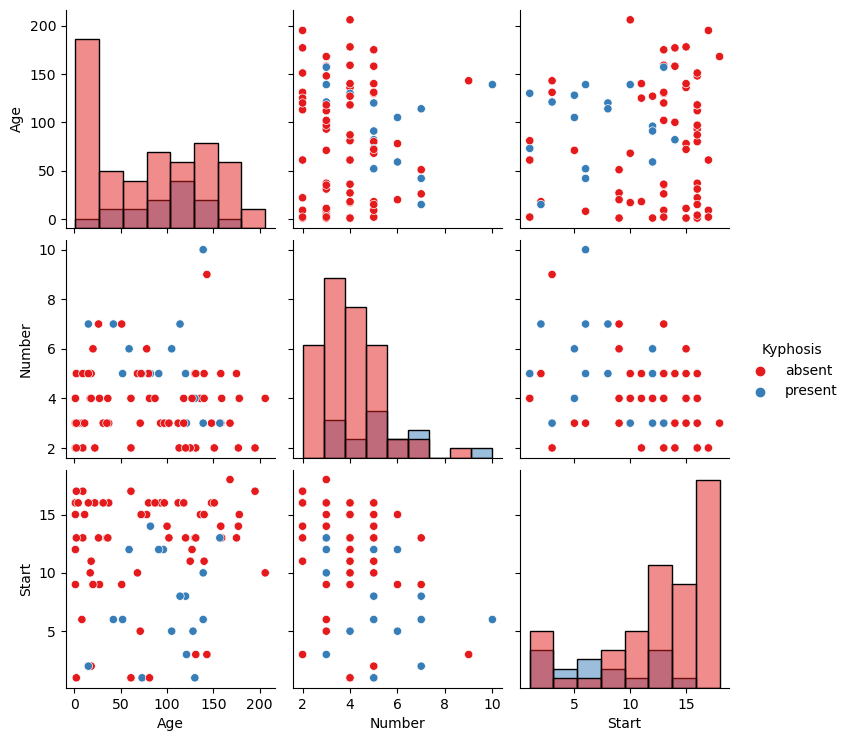

In [4]:
sns.pairplot(
    df, 
    hue='Kyphosis', 
    palette='Set1',
    diag_kind='hist',
)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=101
)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [14]:
print(confusion_matrix(y_test, predictions))

[[13  4]
 [ 6  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [15]:
from sklearn import tree

[Text(0.5, 0.9375, 'x[1] <= 4.5\ngini = 0.27\nsamples = 56\nvalue = [47, 9]'),
 Text(0.25, 0.8125, 'x[0] <= 128.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]'),
 Text(0.16666666666666666, 0.6875, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.3333333333333333, 0.6875, 'x[2] <= 13.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.25, 0.5625, 'x[0] <= 181.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.16666666666666666, 0.4375, 'x[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.08333333333333333, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.8125, 'x[0] <= 125.5\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.6666666666666666, 0.6875, 'x[0] <= 81.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.58333

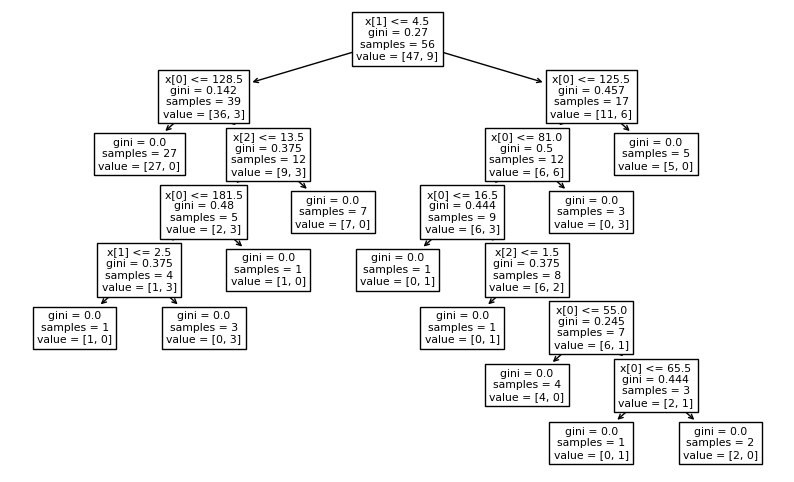

In [16]:
plt.figure(figsize=(10,6))
tree.plot_tree(dtree)

## Random Forests

Now let's compare the decision tree model to a random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
rfc_predictions = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test, rfc_predictions))

[[17  0]
 [ 6  2]]


In [22]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

